In [1]:
from photutils.isophote import build_ellipse_model
from photutils.aperture import EllipticalAperture
from photutils.isophote import EllipseGeometry
from photutils.isophote import Ellipse
from astropy.nddata import CCDData
import matplotlib.pyplot as plt
from astropy.io import fits
import astroalign as aa
import numpy as np
import os, glob
import ccdproc

#### STACKING

In [2]:
#NO ALINEAMOS LA IMAGEN PORQUE ASTROALIGN NO ENCONTRABA LA SUFICIENTE CANTIDAD DE ESTRELLAS DE REFERENCIA Y
#TIRABA EL ERROR DE NO MATCHING TRIANGLES


imgs_directory = '/home/astro/Documenti/2023/ELLIP_GALAXY/ReducedImgs/*.FIT'
directory = glob.glob(imgs_directory)
directory.sort()
images = [CCDData.read(element,unit='adu') for element in directory]
combined = ccdproc.Combiner(images)
average = combined.average_combine()
average = np.array(average)
fits.writeto('/home/astro/Documenti/2023/ELLIP_GALAXY/'+'combined.FIT',average, overwrite = True)

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


#### PLOT

In [3]:
#Accessing to the combined image, first element(data)
hdulist = fits.open('/home/astro/Documenti/2023/ELLIP_GALAXY/combined.FIT')
data = hdulist[0].data
data = np.array(data)
hdulist.close()
data

array([[5.01411667e+04, 3.48529000e+04, 4.35500667e+04, ...,
        1.49066667e+02, 1.44200000e+02, 1.42200000e+02],
       [3.70934000e+04, 3.59000000e+01, 4.33333333e+00, ...,
        1.52500000e+02, 1.45533333e+02, 1.38333333e+02],
       [3.49346000e+04, 5.53000000e+01, 3.29000000e+01, ...,
        1.35300000e+02, 1.47500000e+02, 1.48400000e+02],
       ...,
       [5.01038333e+04, 9.91333333e+01, 1.60000000e+02, ...,
        1.37733333e+02, 1.42600000e+02, 1.38700000e+02],
       [3.06217333e+04, 5.10000000e+01, 1.24000000e+01, ...,
        1.40633333e+02, 1.55200000e+02, 1.52633333e+02],
       [4.14179667e+04, 4.13832000e+04, 3.05777667e+04, ...,
        1.32300000e+02, 1.41266667e+02, 1.46466667e+02]], dtype='>f8')

In [4]:
#Creamos la elipse que despues se ajustarà a la imagen
geometry = EllipseGeometry(x0=1906, y0=808, sma=20, eps=0, pa=0.0 * np.pi / 180.0)
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma, geometry.sma * (1 - geometry.eps), geometry.pa)

(<matplotlib.patches.Ellipse at 0x70843df0fa30>,)

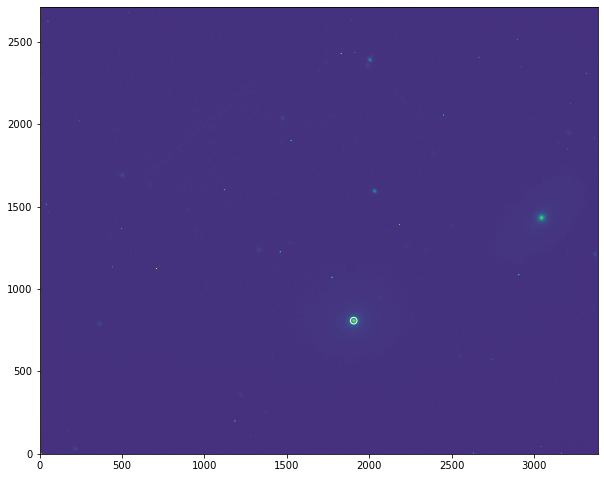

In [5]:
#Graficamos
plt.figure(figsize=(10,13))
plt.imshow(data, origin='lower', vmin=0, vmax=1000)
aper.plot(color='white')

In [6]:
ellipse = Ellipse(data, geometry)
isolist = ellipse.fit_image() #The result is a list of isophotes as an IsophoteList object whose attributes are the
#fit values for each Isophote sorted by the semimajor axis length.

In [7]:
print(isolist.pa)# Print the fit position angles (radians)

[0.         1.61253135 1.62003424 1.65032598 1.70156334 1.75138564
 1.7932163  1.83332613 1.88335285 1.93684467 1.98254813 2.03002929
 2.13799598 2.31479956 2.49498525 2.67360939 2.79384943 2.80002669
 0.06225531 0.35630598 0.50684664 0.51842623 0.34210855 2.90084884
 2.75483113 2.55931396 2.35755925 2.31865288 2.31447194 2.38479905
 2.44391826 2.24624384 2.40621443 2.61601552 2.63008976 2.66657809
 2.67487992 2.47456645 2.47456645 2.47456645 2.90890047 3.06064872
 3.10905445 0.02751172 0.16283136 0.23053605 0.16403822 0.1972712
 0.27431185 0.21608267 0.21608267 0.38451521 0.38451521 0.38451521
 0.46837851 0.29679247 0.40863961 0.56977003 0.37311119 0.35553959
 0.40781712 0.4470473  0.28192302 0.54937626 0.54937626 0.37442252
 0.37442252 1.94521885 2.77558601 2.77558601 2.77558601]


In [8]:
#We can also show the isophote values as a table, which is again sorted by the semimajor axis length:
lista_iso = isolist.to_table()
lista_iso

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int64,int64,int64,int64
0.0,883.7936972026871,0.0,0.0,0.0,0.0,0.0,0.0,None,None,1904.0099052049482,0.0,808.2974738320457,0.0,1,0,0,0
0.5346972612827552,882.9431323830979,0.011472765509516078,0.930144664595879,0.0011453017640876168,92.3912409312167,0.06813999296814244,-3.5191840122105216,1.4090078663673684,0.4003791394478181,1904.0099052049482,0.00036494871070037055,808.2974738320457,0.004384182401905332,13,0,50,2
0.5881669874110307,882.6827757012722,0.019275433020375782,0.9223955042235619,0.0020936772603883445,92.8211245750607,0.12471913411811707,-3.7875354926083116,1.6196670127156103,0.4276308475198514,1904.0110376851987,0.0007454411646679981,808.3412762006031,0.00793351129302658,13,0,50,2
0.6469836861521338,880.4449512172258,0.08775020319321067,0.8154638863813696,0.009434942338092757,94.55671350526323,0.578282593028101,-9.368425219564328,3.981375455235382,0.4249780899057583,1904.021122095117,0.003403963571353061,808.4591958498654,0.016502791629372415,13,0,23,0
0.7116820547673471,878.2314989056673,0.258599827458044,0.7227019570583496,0.02692537112067053,97.4923978298712,1.7270356178041624,-13.22160045371103,6.369483468806261,0.48174829447508216,1904.0353253370463,0.010792451267711056,808.4606700332362,0.034311683850779214,13,0,12,0
0.7828502602440819,875.9027124168604,0.3634493982510461,0.6422482981692207,0.036156087106248555,100.34700549613285,2.4549179107691677,-16.288652997911445,7.424786473623195,0.4558256888752687,1904.0487154085781,0.016031511177139496,808.4411514420638,0.03903366087322798,13,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238.36353075454468,150.21064567472456,0.1278706011875728,0.15348225675318952,0.11651691625736366,21.452830142358817,23.674752717073595,-0.010993656127735688,0.0073753977648159256,0.6708776115171252,1897.4786767077994,15.831385166451573,807.2021646496818,14.495632304517477,1382,0,12,0


In [9]:
print(isolist.to_table())

       sma               intens            intens_err      ... niter stop_code
                                                           ...                
------------------ ------------------ -------------------- ... ----- ---------
               0.0  883.7936972026871                  0.0 ...     0         0
0.5346972612827552  882.9431323830979 0.011472765509516078 ...    50         2
0.5881669874110307  882.6827757012722 0.019275433020375782 ...    50         2
0.6469836861521338  880.4449512172258  0.08775020319321067 ...    23         0
0.7116820547673471  878.2314989056673    0.258599827458044 ...    12         0
0.7828502602440819  875.9027124168604   0.3634493982510461 ...    10         0
               ...                ...                  ... ...   ...       ...
216.69411886776788  151.6327717810783  0.13895553829228086 ...    12         0
238.36353075454468 150.21064567472456   0.1278706011875728 ...    12         0
 262.1998838299992  149.0310400324217  0.11659853531

In [10]:
type(isolist)

photutils.isophote.isophote.IsophoteList

In [11]:
#mediana del np.array de la imagen es el background que se le resta a intensity, luego saco el logaritmo de eso para la magni-
#tud real. isolist.sma elevar a la 1/4.
background = np.median(data)
mu_wiggle = (-2.5)*np.log10(isolist.intens-background)

Text(0, 0.5, 'Center Y position')

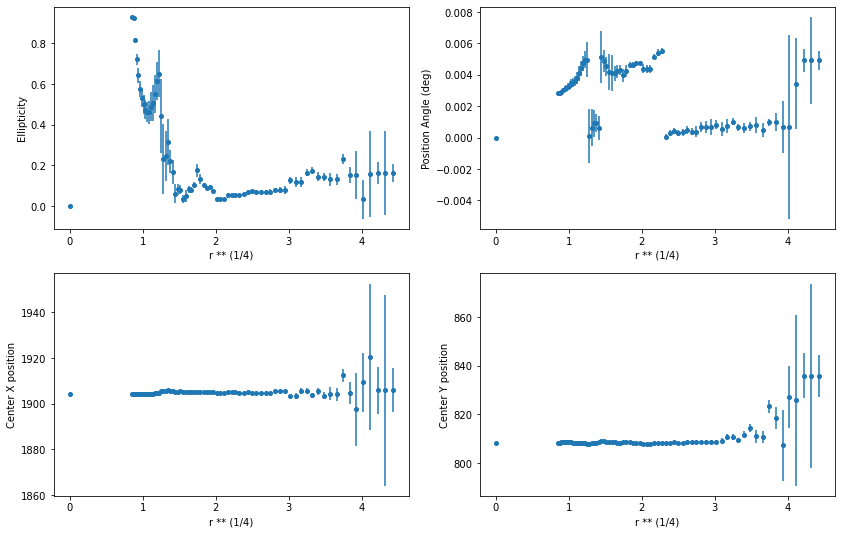

In [12]:
plt.figure(figsize=(14, 9))
plt.figure(1)

plt.subplot(2,2,1)
plt.errorbar(isolist.sma**(1/4), isolist.eps, yerr=isolist.ellip_err, fmt='o', markersize=4)
plt.xlabel('r ** (1/4)')
plt.ylabel('Ellipticity')#no deberia variar mas que 0.06

plt.subplot(2,2,2)
plt.errorbar(isolist.sma**(1/4), isolist.pa/(np.pi*180.), yerr=isolist.pa_err/(np.pi* 80.), fmt='o', markersize=4)
plt.xlabel('r ** (1/4)')
plt.ylabel('Position Angle (deg)') #no deberia variar mas que 0.087rad

plt.subplot(2,2,3)
plt.errorbar(isolist.sma**(1/4), isolist.x0, yerr=isolist.x0_err, fmt='o', markersize=4)
plt.xlabel('r ** (1/4)')
plt.ylabel('Center X position')

plt.subplot(2,2,4)
plt.errorbar(isolist.sma**(1/4), isolist.y0, yerr=isolist.y0_err, fmt='o', markersize=4)
plt.xlabel('r ** (1/4)')
plt.ylabel('Center Y position')

In [13]:
#model_image = build_ellipse_model(data.shape, isolist)
#residual = data - model_image

Text(0, 0.5, 'mu_wiggle')

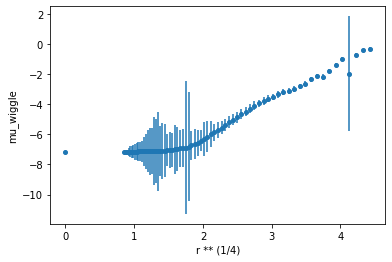

In [14]:
plt.errorbar(isolist.sma**(1/4), mu_wiggle, yerr=isolist.int_err, fmt='o', markersize=4)
plt.xlabel('r ** (1/4)')
plt.ylabel('mu_wiggle')

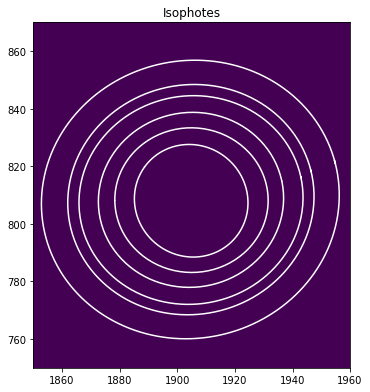

In [15]:
fig, (ax1) = plt.subplots(figsize=(14, 5), nrows=1, ncols=1)
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(data, origin='lower', extent=[1850,1960, 750,870])
ax1.set_title('Isophotes')

smas = np.linspace(20, 50, 6)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

In [16]:
#remove of the small r**1/4. Start from 20 approx.
radii_sliced = (isolist.sma[32:69])**(1/4)
#we keep the last 14 points of the array

In [17]:
mu_wiggle_sliced = mu_wiggle[32:69]

In [18]:
yerror_sliced = isolist.int_err[32:69]

In [30]:
mu_wiggle_err = (2.5/np.log(10))*(isolist.int_err[32:69]/(isolist.intens[32:69]-background))
mu_wiggle_err

array([0.00745345, 0.00214208, 0.00240463, 0.00224476, 0.00202317,
       0.0037785 , 0.00383238, 0.00370253, 0.00260708, 0.00289955,
       0.00287438, 0.00293673, 0.00369837, 0.00375751, 0.00455632,
       0.00471933, 0.0054094 , 0.00611286, 0.00775114, 0.00684594,
       0.0082453 , 0.00898421, 0.00943537, 0.01025225, 0.01138743,
       0.01149545, 0.01308747, 0.01397153, 0.01657202, 0.02083723,
       0.02226547, 0.02859529, 0.02958543, 0.03775413, 0.05068459,
       0.6758603 , 0.06447024])

Slope = 2.433541556592619
Slope error = 0.0504917083005531
Intersect = -11.048120525417248
Intersect error = 0.1478161197699221
Adj coef = 0.9925505101269689


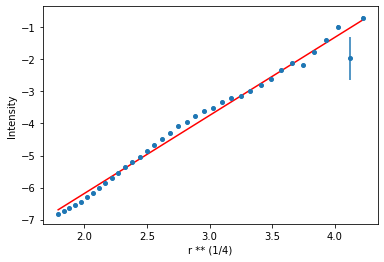

In [31]:
coeficientes, matriz_cov = np.polyfit(radii_sliced, mu_wiggle_sliced, 1, cov = True)
coef_adj = np.corrcoef(radii_sliced, mu_wiggle_sliced)[0,1]
m,b = coeficientes

error_m = np.sqrt(matriz_cov[0,0])
error_b = np.sqrt(matriz_cov[1,1])

y_ajustada = m * radii_sliced + b

plt.errorbar(radii_sliced, mu_wiggle_sliced, yerr = mu_wiggle_err, fmt='o', markersize=4)
plt.plot(radii_sliced, y_ajustada, color = 'red')
plt.xlabel('r ** (1/4)')
plt.ylabel('Intensity')
print('Slope =',m)
print('Slope error =',error_m)
print('Intersect =',b)
print('Intersect error =',error_b)
print('Adj coef =',coef_adj)
#Slope = 2.433541556592619
#Slope error = 0.0504917083005531
#Intersect = -11.048120525417248
#Intersect error = 0.1478161197699221
#Adj coef = 0.9925505101269689


In [21]:
#the equation is mu = 8.3268*[(r/r_e)**(1/4)] + (mu_e - 8.3268) then

In [22]:
effective_radius_pix = (8.3268/m)**4 #From slope
print('effective radius in pixels =',effective_radius_pix,'[pixels]')
mu_e = b + 8.3268
print('effective mu =',mu_e)
#effective radius in pixels = 137.07475127005137 [pixels]
#effective mu = -2.721320525417248


effective radius in pixels = 137.07475127005137 [pixels]
effective mu = -2.721320525417248


In [23]:
eff_rad_r = effective_radius_pix*1.618600598100847e-06 # [pixels*rad/pixels] = [rad]
eff_rad_arcseg = eff_rad_r*((180*3600)/np.pi)
print(eff_rad_arcseg,'arcseg')
#45.763822894284644 arcseg

#eff rad in arcseg from literature is 54''.8 ± 3''.5

45.763822894284644 arcseg
